<a href="https://colab.research.google.com/github/joaovictordds/Segmentacao_de_clientes/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2ª Etapa: Análise Exploratória dos Dados

Você faz parte do time de cientistas de dados da empresa All In One Place, que precisa determinar quem são os clientes elegíveis para participar da campanha Insiders.

Em posse dessa lista, o time de Marketing fará uma sequência de ações personalizadas e exclusivas ao grupo, de modo a aumentar o faturamento e a frequência de compra.

Como resultado para esse projeto, é esperado que você entregue uma lista de pessoas elegíveis a participar do programa Insiders, junto com um relatório respondendo às seguintes perguntas:

* Quem são as pessoas elegíveis para participar do programa de Insiders ?
* Quantos clientes farão parte do grupo?
* Quais as principais características desses clientes ?
* Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
* Qual a expectativa de faturamento desse grupo para os próximos meses ?
* Quais as condições para uma pessoa ser elegível ao Insiders ?
* Quais as condições para uma pessoa ser removida do Insiders ?
* Qual a garantia que o programa Insiders é melhor que o restante da base ?
* Quais ações o time de marketing pode realizar para aumentar o faturamento?


Nesta etapa:

* Levantar hipóteses sobre as características de um cliente Insider. Validar ou refutar essas hipóteses através dos dados.

In [1]:
import pandas as pd
dados = pd.read_csv('dataprep.csv')
dados.drop(columns='Unnamed: 0', inplace=True)
dados.head(4)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34


### Exploração dos Dados
* Levante Hipóteses sobre as características de um cliente Insider. Valide ou refute essas hipóteses através dos dados.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


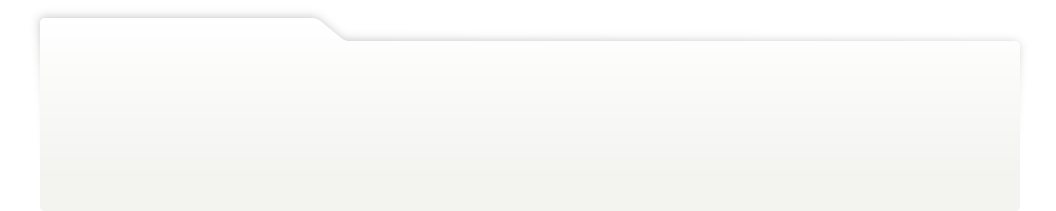
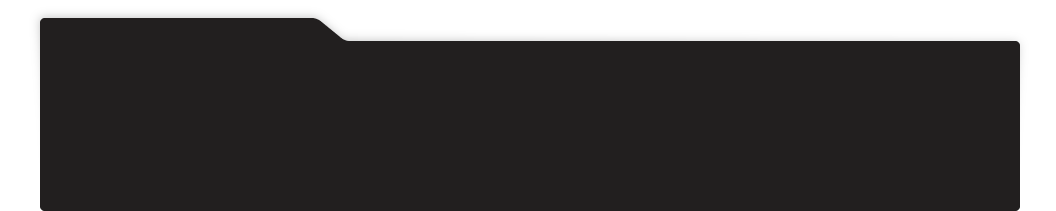
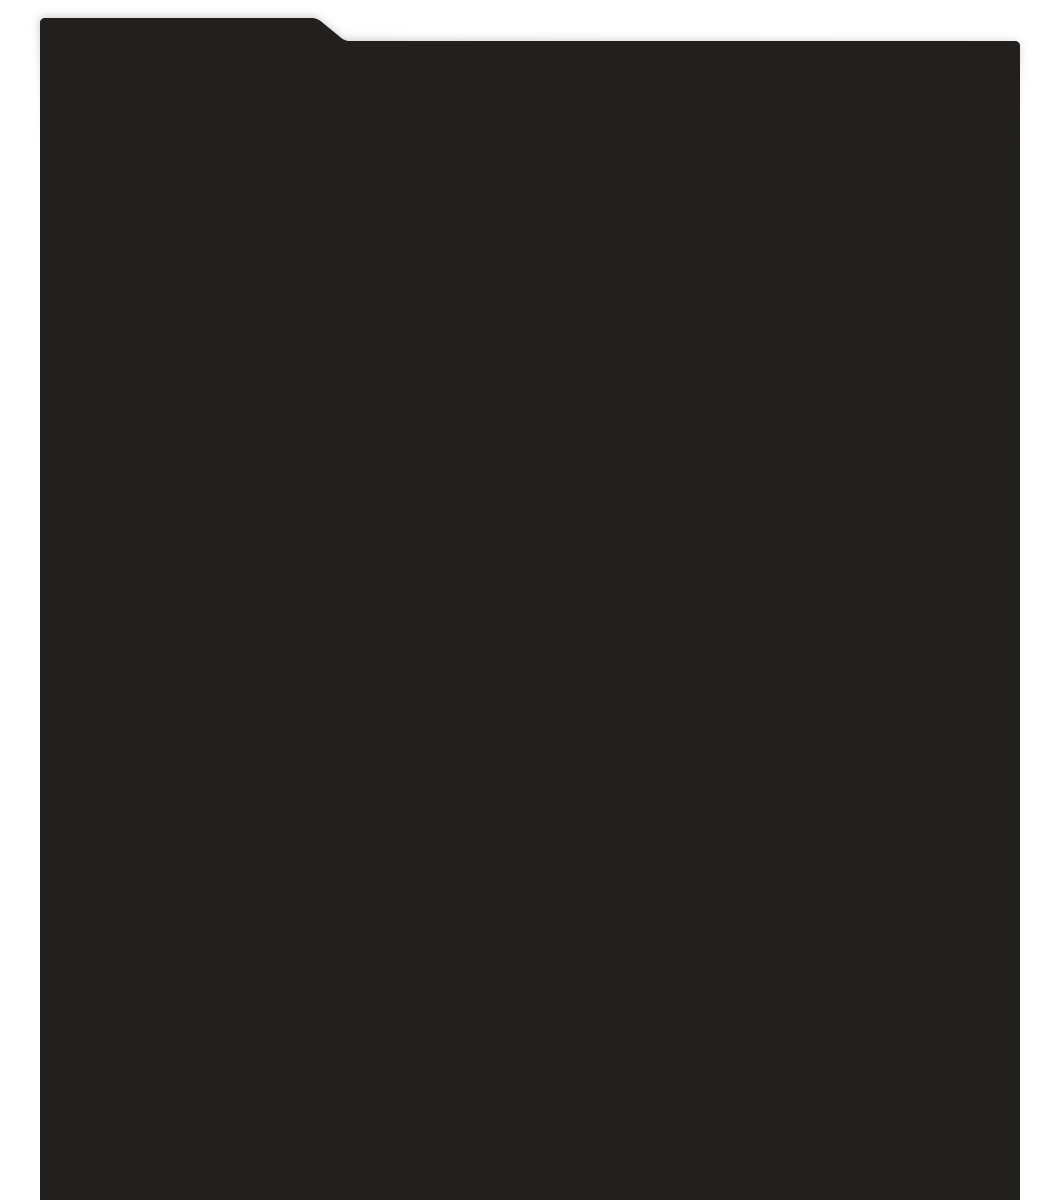
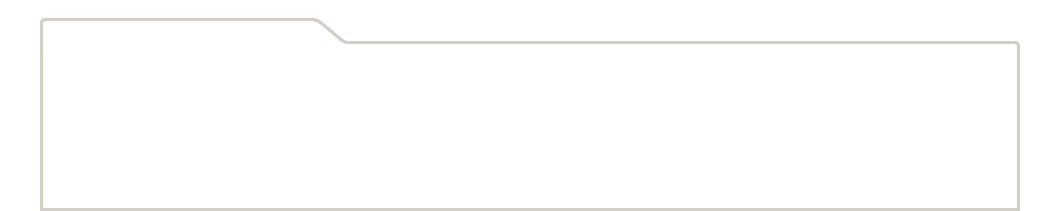
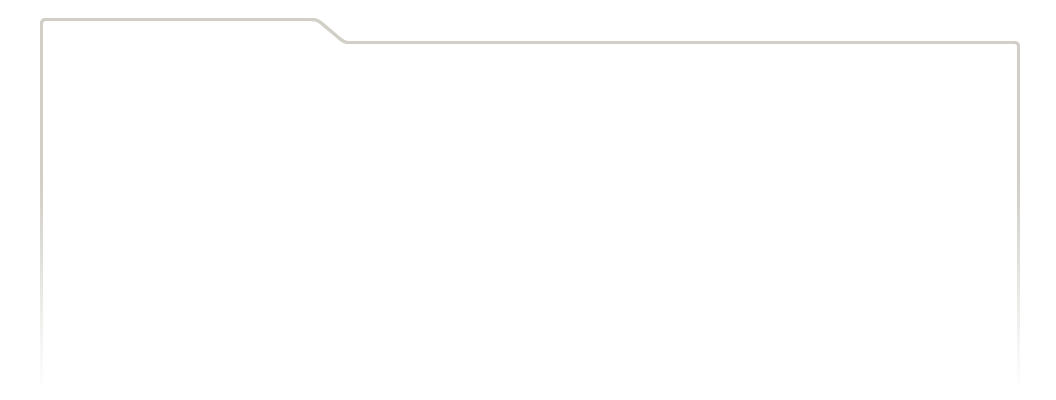
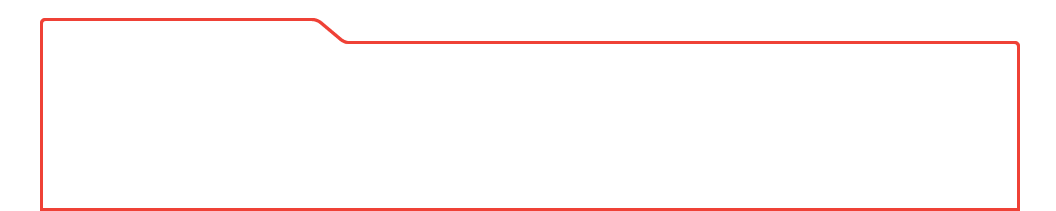
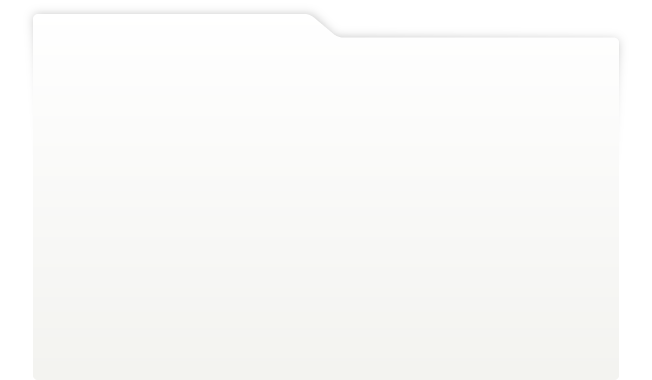
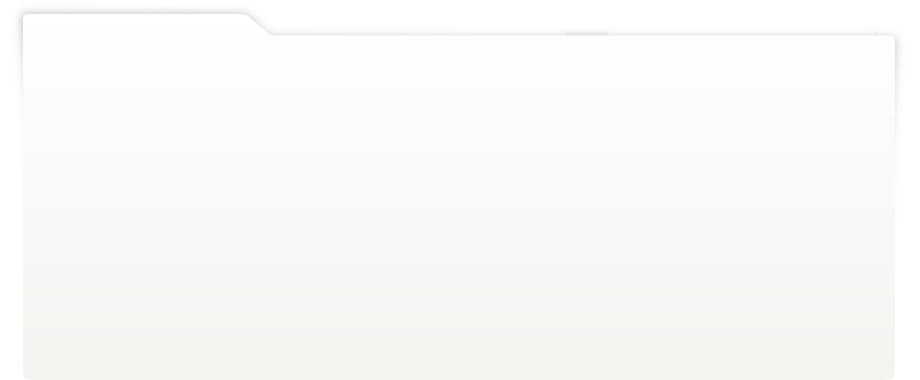
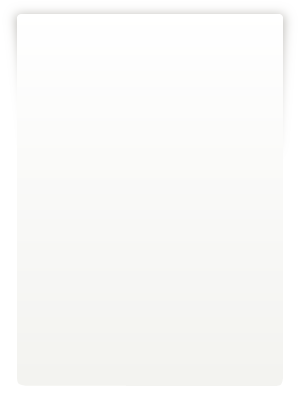
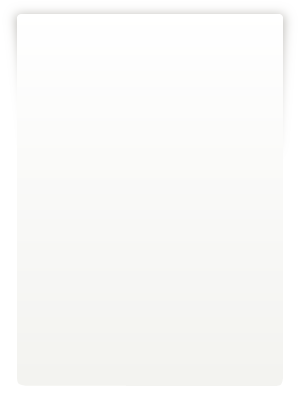
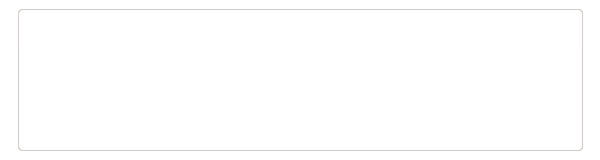
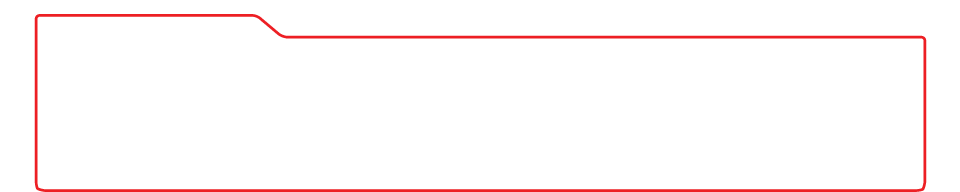
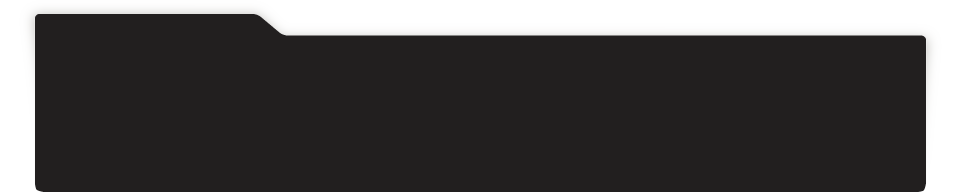
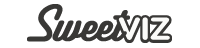
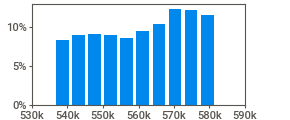
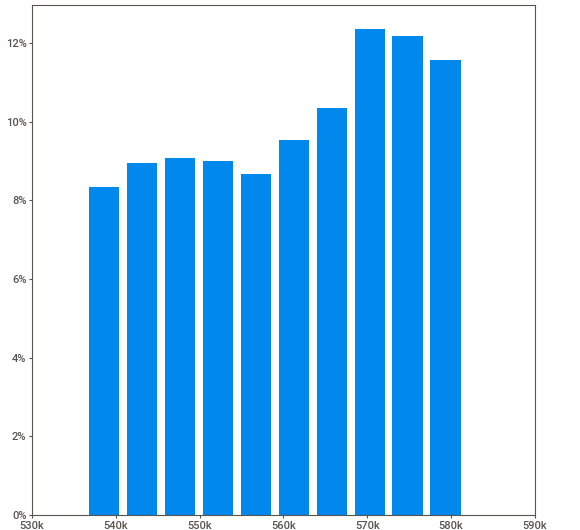
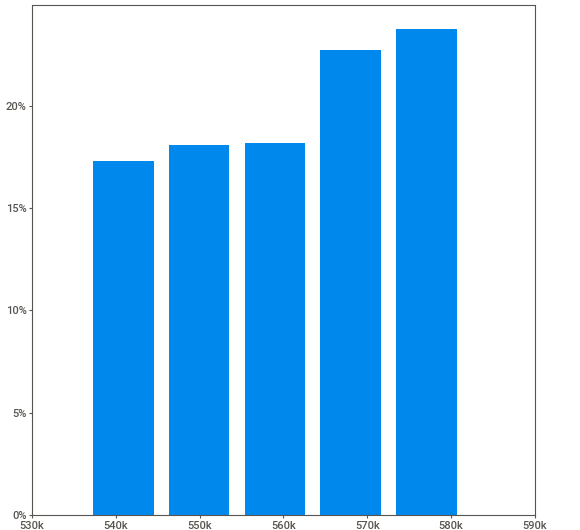
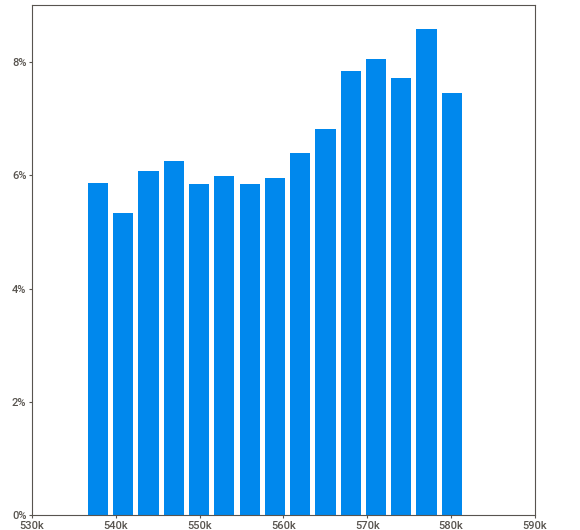
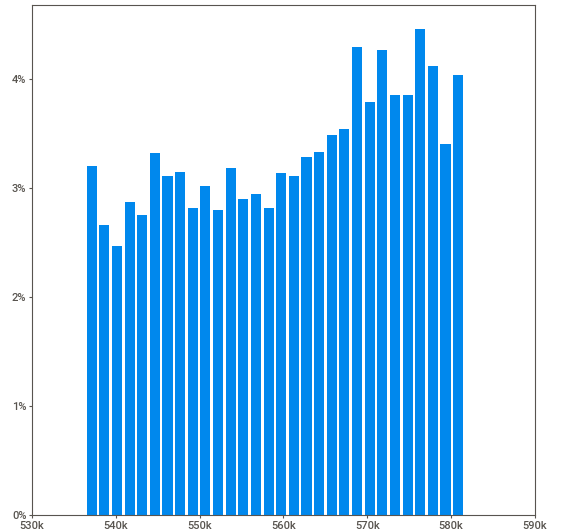
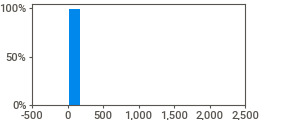
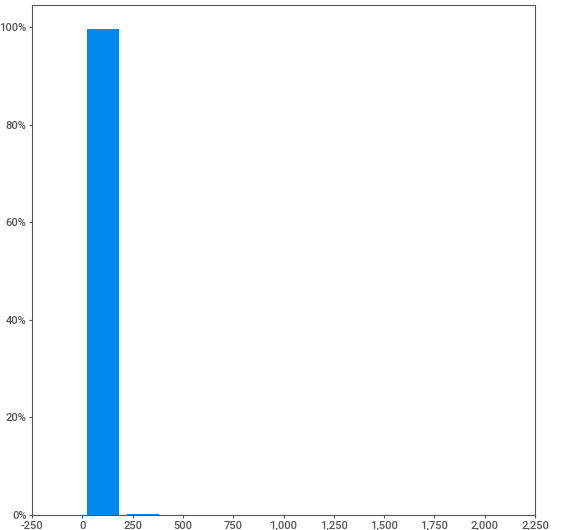
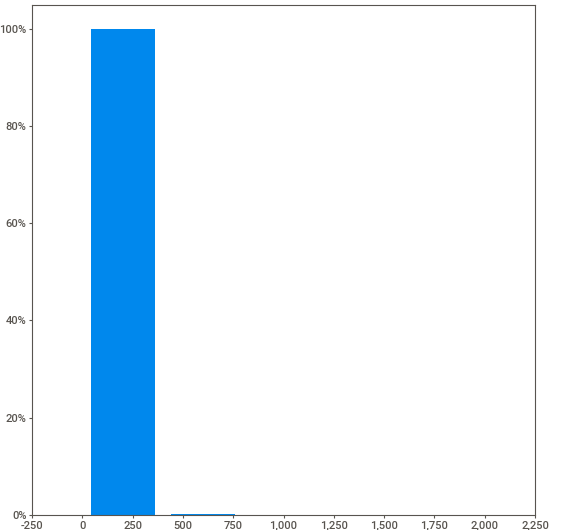
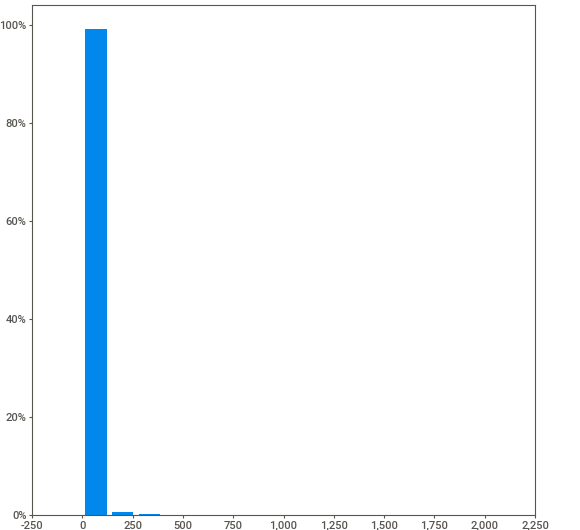
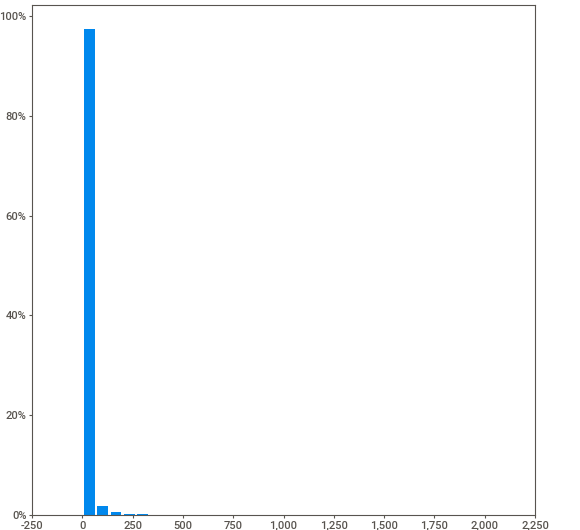
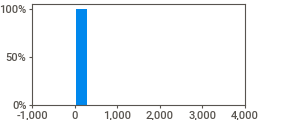
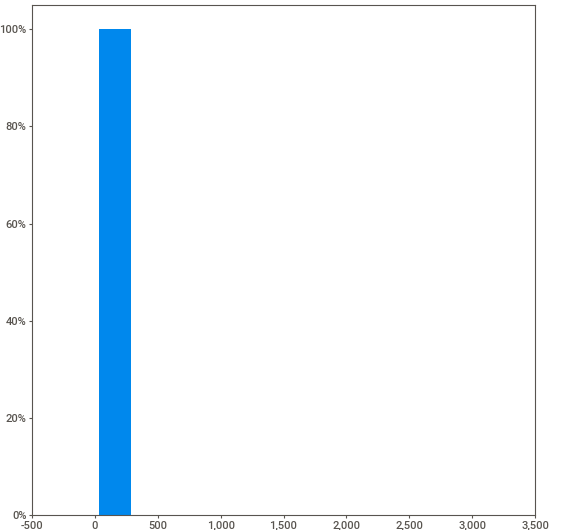
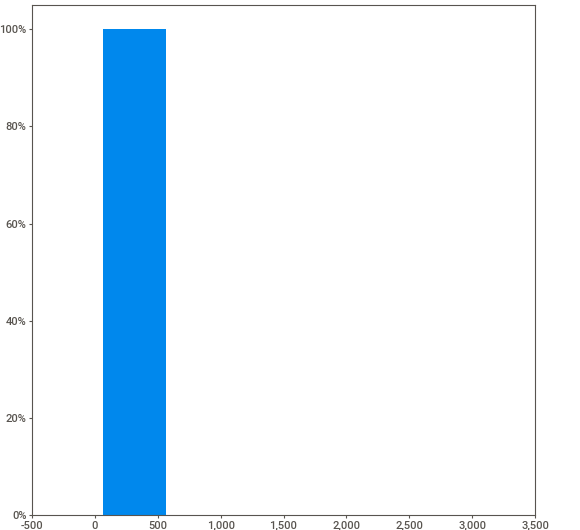
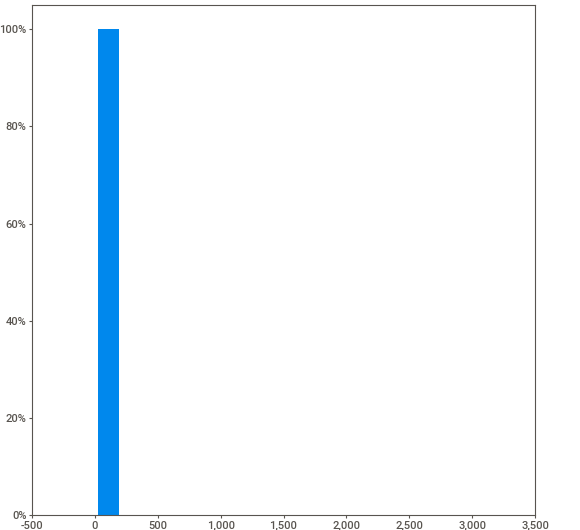
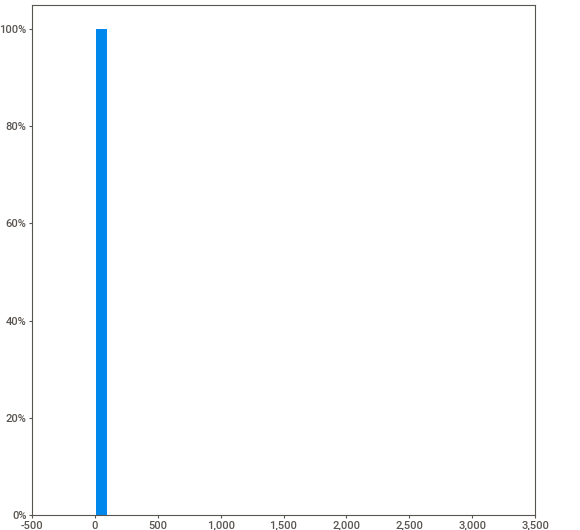
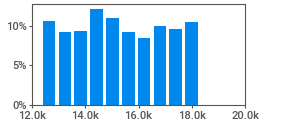
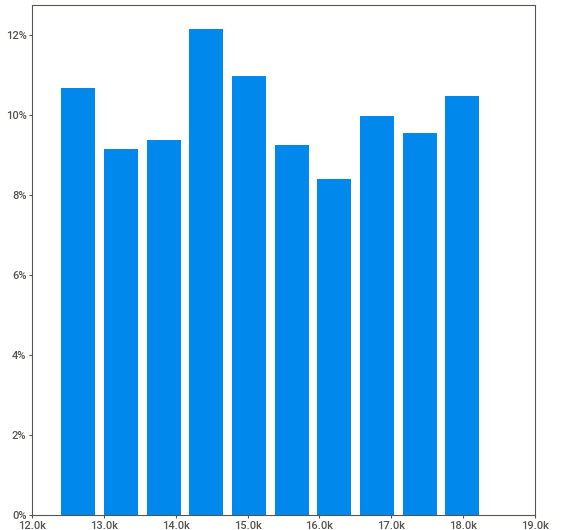
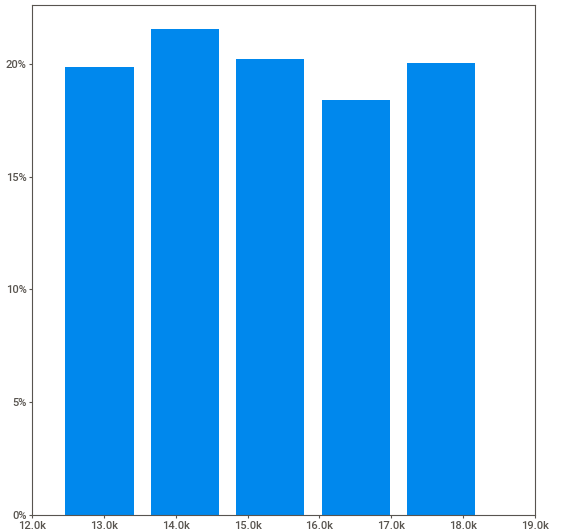
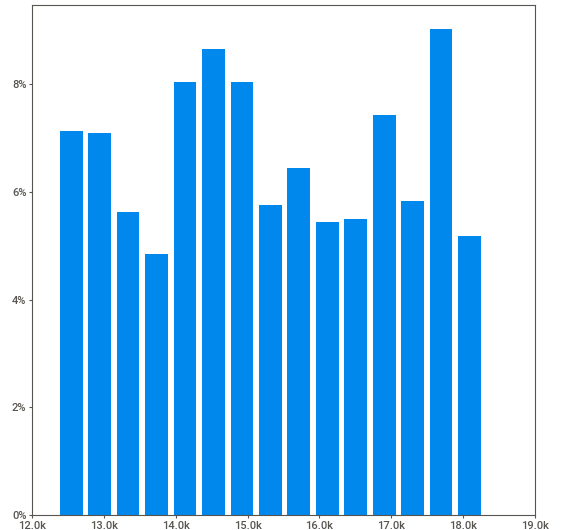
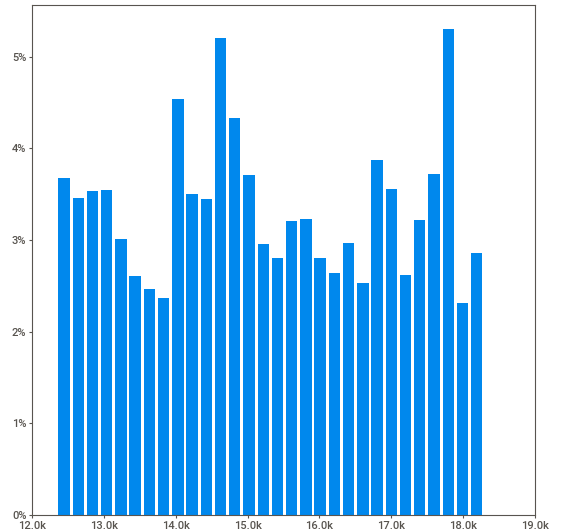
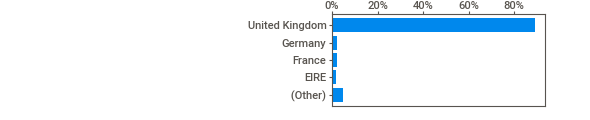
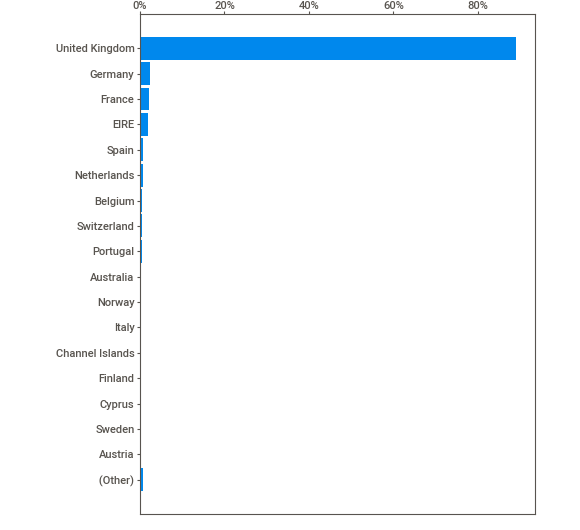
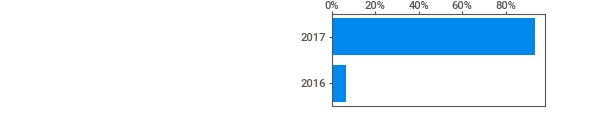
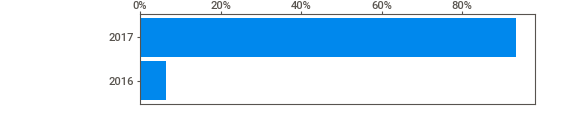
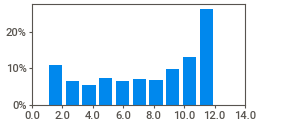
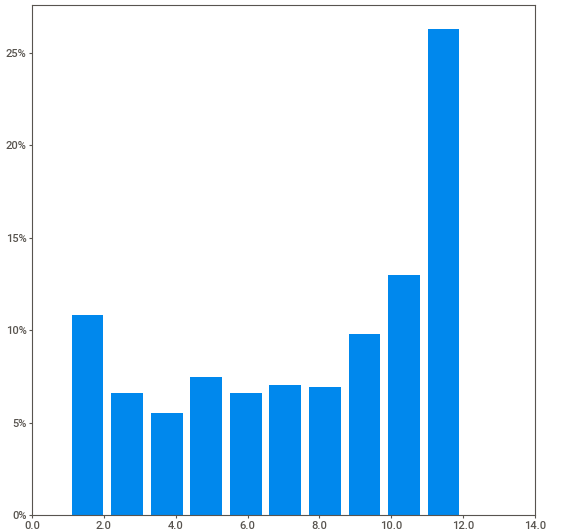
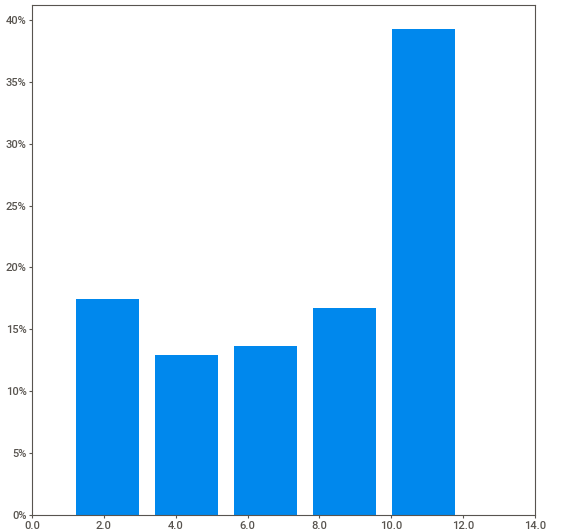
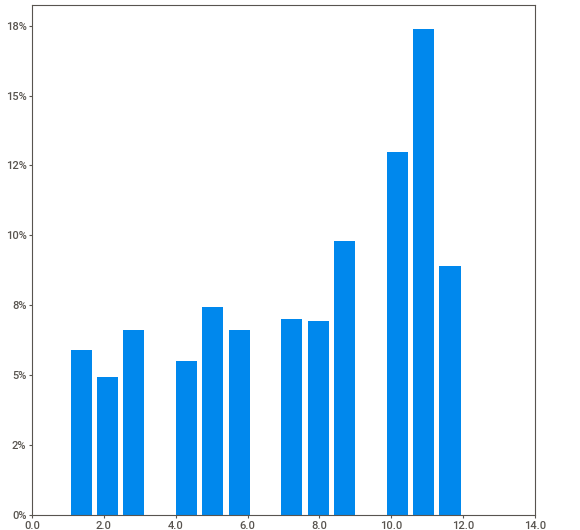
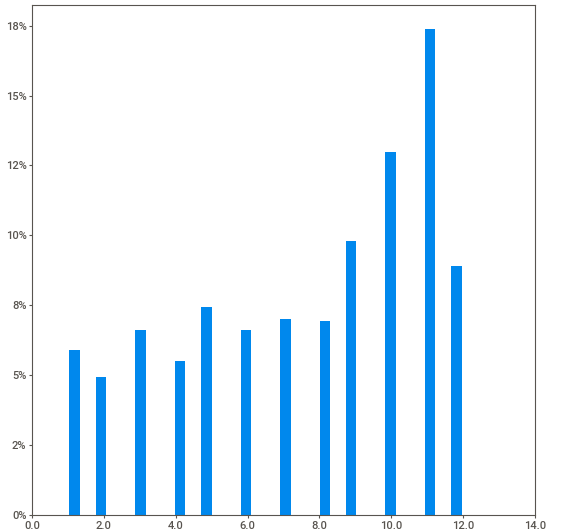
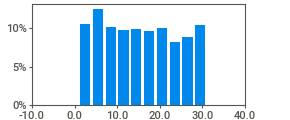
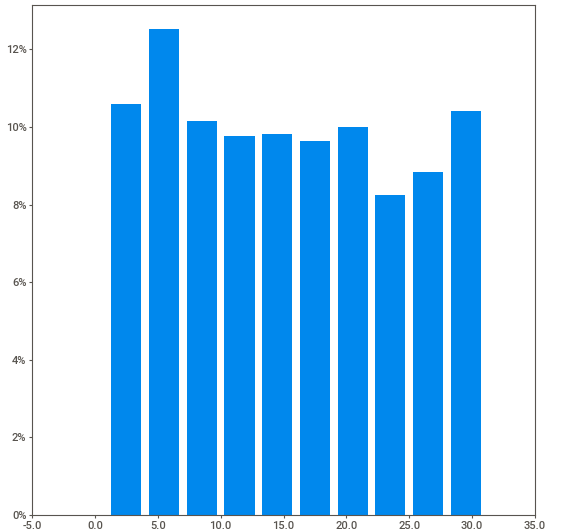
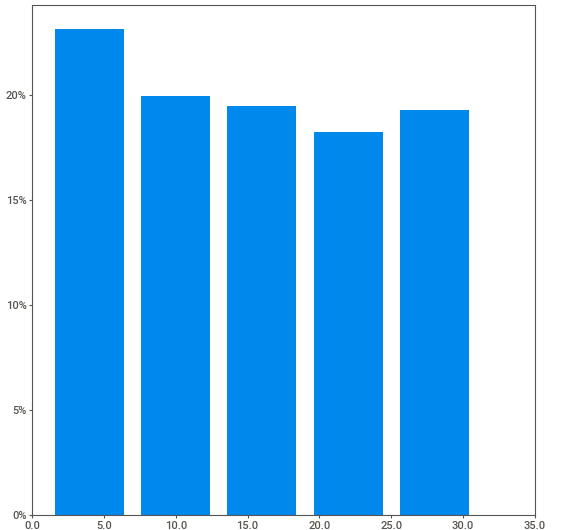
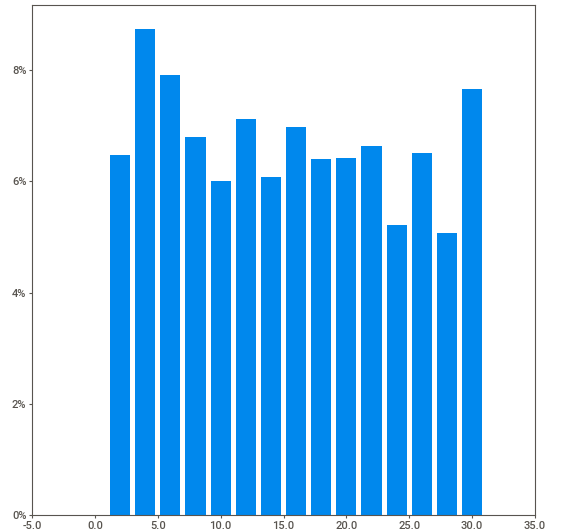
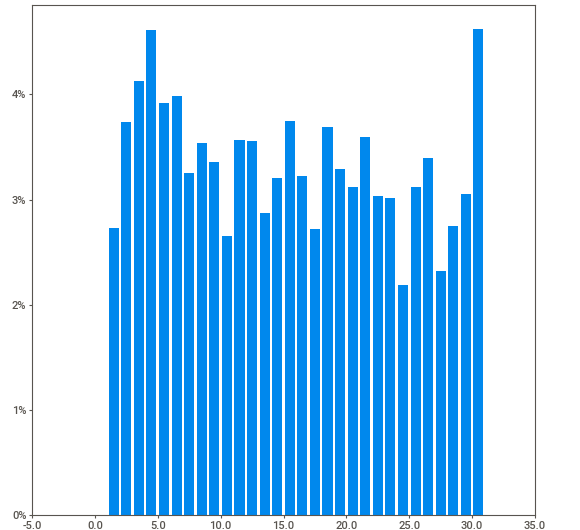
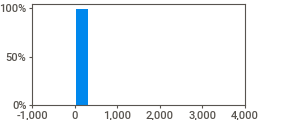
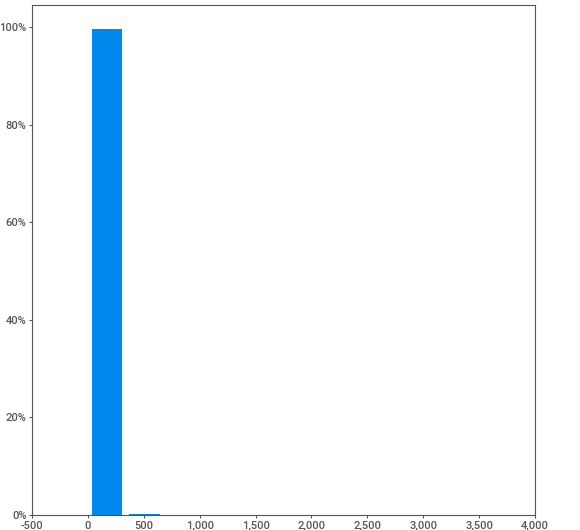
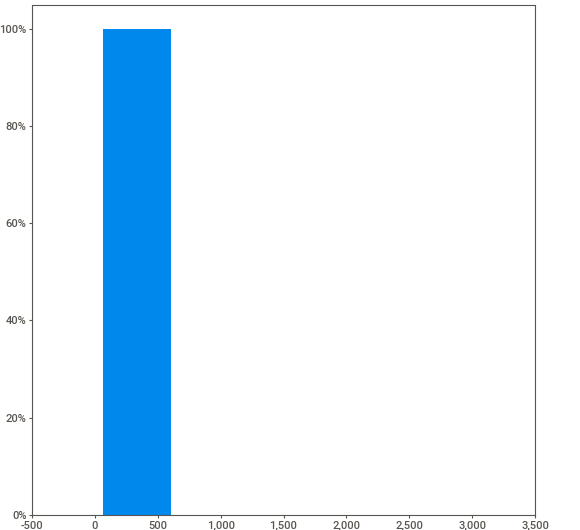
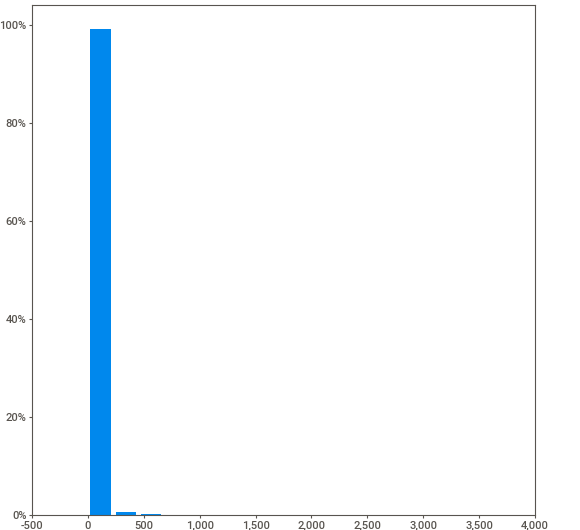
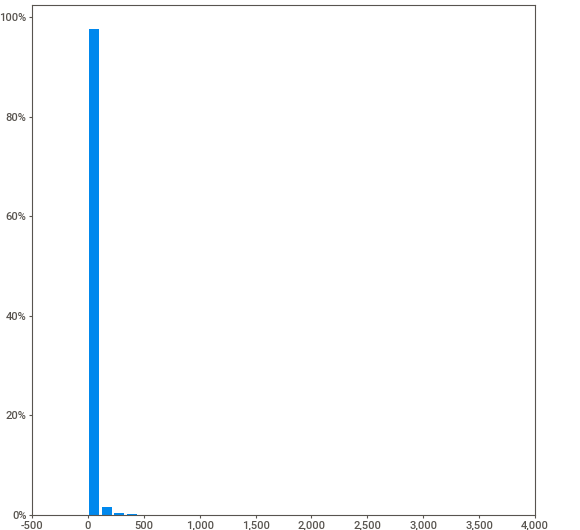
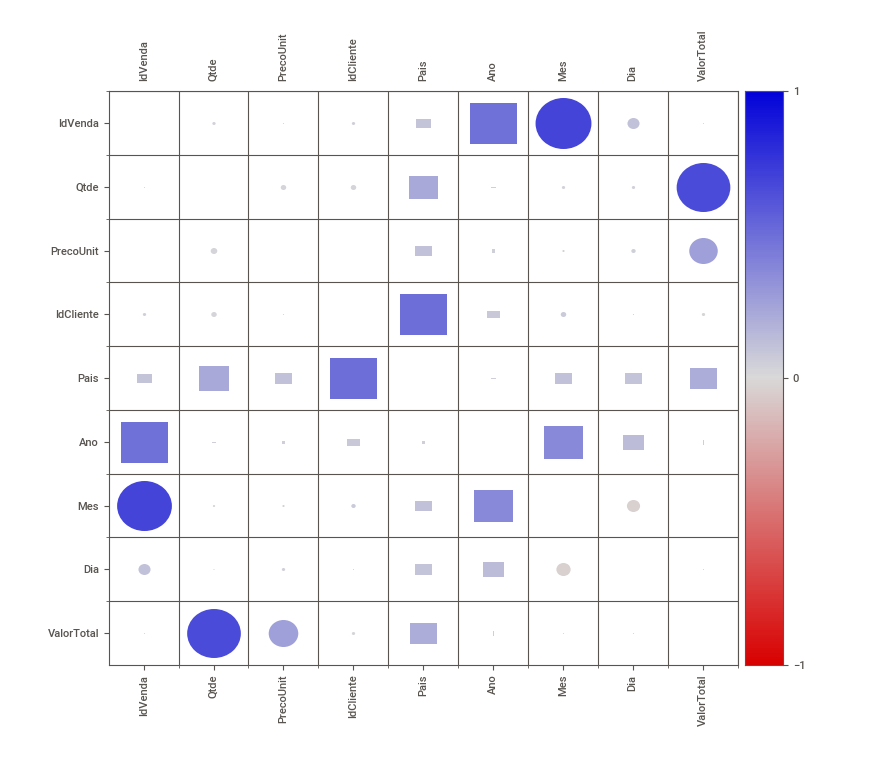
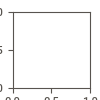

In [ ]:
import sweetviz as sv
eda = sv.analyze(dados)
eda.show_notebook()

* Quem são as pessoas elegíveis para participar do programa de Insiders ?
* Quantos clientes farão parte do grupo?

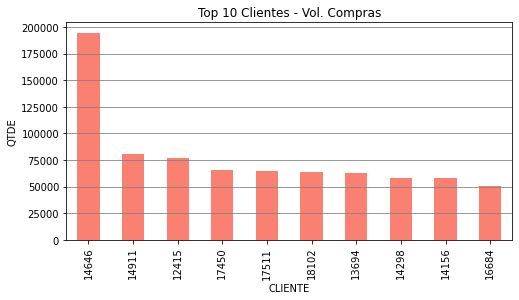

In [10]:
top_vol = dados.groupby('IdCliente')['Qtde'].sum()
top_vol = top_10_clientes.sort_values(ascending=False).head(10)

# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(8,4))
top_vol.plot(kind='bar', color='salmon')
plt.title('Top 10 Clientes - Vol. Compras')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')
plt.grid(axis='y', color='gray')
plt.show();

In [36]:
dados.groupby('IdCliente')['Qtde'].sum().sort_values(ascending=False).head(10)

IdCliente
14646    194515
14911     80265
12415     77374
17450     65689
17511     64549
18102     63524
13694     63312
14298     58343
14156     57885
16684     50255
Name: Qtde, dtype: int64

In [35]:
# Pedidos com 500+ itens vendidos
dados[dados['Qtde'] > 500].sort_values(by=['Qtde'], ascending=False)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
121683,552172,16014,SMALL CHINESE STYLE SCISSOR,2000,2017-05-04,0.32,16308,United Kingdom,2017,5,4,640.00
109595,550461,21175,GIN + TONIC DIET METAL SIGN,2000,2017-04-16,1.69,15749,United Kingdom,2017,4,16,3380.00
220784,564272,16014,SMALL CHINESE STYLE SCISSOR,2000,2017-08-22,0.32,16308,United Kingdom,2017,8,22,640.00
310423,573261,22197,POPCORN HOLDER,1992,2017-10-26,0.72,17949,United Kingdom,2017,10,26,1434.24
248653,567423,23285,PINK VINTAGE SPOT BEAKER,1944,2017-09-18,1.08,17450,United Kingdom,2017,9,18,2099.52
...,...,...,...,...,...,...,...,...,...,...,...,...
215206,563684,85106,CUT GLASS HEXAGON T-LIGHT HOLDER,504,2017-08-16,1.69,17386,United Kingdom,2017,8,16,851.76
344822,576374,21232,STRAWBERRY CERAMIC TRINKET BOX,504,2017-11-13,1.06,13777,United Kingdom,2017,11,13,534.24
156640,556505,22616,PACK OF 12 LONDON TISSUES,504,2017-06-11,0.29,17381,United Kingdom,2017,6,11,146.16
292808,571553,21098,CHRISTMAS TOILET ROLL,504,2017-10-16,1.06,17317,United Kingdom,2017,10,16,534.24


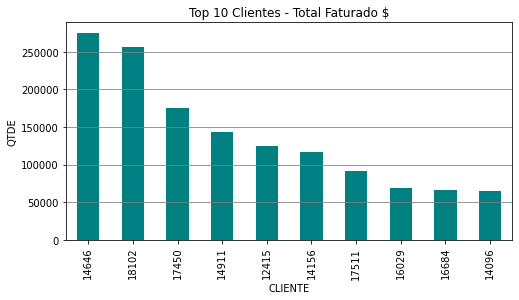

In [ ]:
top_10_clientes = dados.groupby('IdCliente')['ValorTotal'].sum()
top_10_clientes = top_10_clientes.sort_values(ascending=False).head(10)

#Gráfico dos TOP 10 faturado $
plt.figure(figsize=(8,4))
top_10_clientes.plot(kind='bar', color='teal')
plt.title('Top 10 Clientes - Total Faturado $')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')
plt.grid(axis='y', color='gray')
plt.show()

In [ ]:
top_10_clientes = dados.groupby('IdCliente')['ValorTotal'].sum()
top_10_clientes = top_10_clientes.sort_values(ascending=False).head(10)
top_10_clientes.head()

IdCliente
14646    275214.02
18102    255829.30
17450    175838.07
14911    143825.06
12415    124914.53
Name: ValorTotal, dtype: float64

In [39]:
# Compras com valor acima de 1k
dados[dados['ValorTotal'] > 1000].sort_values(by=['ValorTotal'], ascending=False)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
109595,550461,21175,GIN + TONIC DIET METAL SIGN,2000,2017-04-16,1.69,15749,United Kingdom,2017,4,16,3380.0
32779,540818,47556B,TEA TIME TEA TOWELS,1300,2017-01-09,2.55,15749,United Kingdom,2017,1,9,3315.0
299434,572209,23555,LANDMARK FRAME NOTTING HILL,300,2017-10-19,10.95,18102,United Kingdom,2017,10,19,3285.0
299435,572209,23558,LANDMARK FRAME LONDON BRIDGE,300,2017-10-19,10.95,18102,United Kingdom,2017,10,19,3285.0
299437,572209,23553,LANDMARK FRAME CAMDEN TOWN,300,2017-10-19,10.95,18102,United Kingdom,2017,10,19,3285.0
...,...,...,...,...,...,...,...,...,...,...,...,...
218494,564046,85123A,WHITE HANGING HEART T-LIGHT HOLDER,400,2017-08-20,2.55,16013,United Kingdom,2017,8,20,1020.0
98450,549027,22729,ALARM CLOCK BAKELIKE ORANGE,300,2017-04-03,3.39,17857,United Kingdom,2017,4,3,1017.0
98451,549027,22726,ALARM CLOCK BAKELIKE GREEN,300,2017-04-03,3.39,17857,United Kingdom,2017,4,3,1017.0
3606,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2016-11-30,0.55,15299,United Kingdom,2016,11,30,1003.2


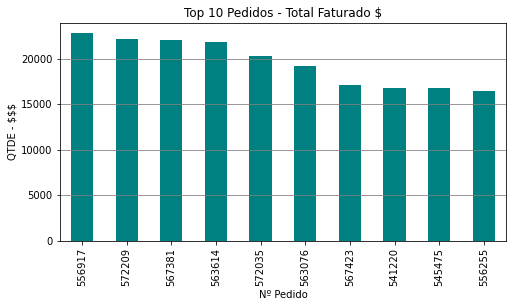

In [41]:
top_10_pedidos = dados.groupby('IdVenda')['ValorTotal'].sum()
top_10_pedidos = top_10_pedidos.sort_values(ascending=False).head(10)

#Gráfico dos TOP 10 pedidos - $
plt.figure(figsize=(8,4))
top_10_pedidos.plot(kind='bar', color='teal')
plt.title('Top 10 Pedidos - Total Faturado $')
plt.xlabel('Nº Pedido')
plt.ylabel('QTDE - $$$')
plt.grid(axis='y', color='gray')
plt.show()

In [54]:
# Detalhe dos pedidos
dados[dados['IdVenda'] == 556917]

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
159568,556917,21992,VINTAGE PAISLEY STATIONERY SET,12,2017-06-13,1.25,12415,Australia,2017,6,13,15.0
159569,556917,21993,FLORAL FOLK STATIONERY SET,60,2017-06-13,1.25,12415,Australia,2017,6,13,75.0
159570,556917,21933,PINK VINTAGE PAISLEY PICNIC BAG,100,2017-06-13,1.65,12415,Australia,2017,6,13,165.0
159571,556917,21990,MODERN FLORAL STATIONERY SET,72,2017-06-13,1.25,12415,Australia,2017,6,13,90.0
159572,556917,84944,SET OF 6 KASHMIR FOLKART BAUBLES,60,2017-06-13,1.65,12415,Australia,2017,6,13,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159701,556917,22360,GLASS JAR ENGLISH CONFECTIONERY,96,2017-06-13,2.55,12415,Australia,2017,6,13,244.8
159702,556917,22364,GLASS JAR DIGESTIVE BISCUITS,24,2017-06-13,2.55,12415,Australia,2017,6,13,61.2
159703,556917,22363,GLASS JAR MARMALADE,24,2017-06-13,2.55,12415,Australia,2017,6,13,61.2
159704,556917,21115,ROSE CARAVAN DOORSTOP,16,2017-06-13,5.95,12415,Australia,2017,6,13,95.2


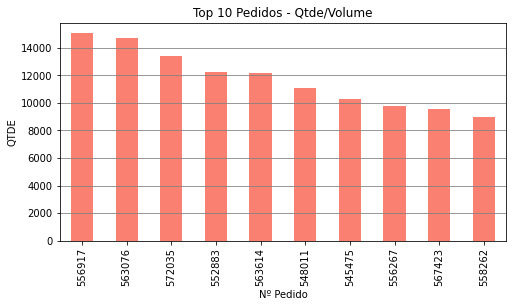

In [44]:
top_10_pedidos = dados.groupby('IdVenda')['Qtde'].sum()
top_10_pedidos = top_10_pedidos.sort_values(ascending=False).head(10)

#Gráfico dos TOP 10 pedidos - $
plt.figure(figsize=(8,4))
top_10_pedidos.plot(kind='bar', color='salmon')
plt.title('Top 10 Pedidos - Qtde/Volume')
plt.xlabel('Nº Pedido')
plt.ylabel('QTDE')
plt.grid(axis='y', color='gray')
plt.show();

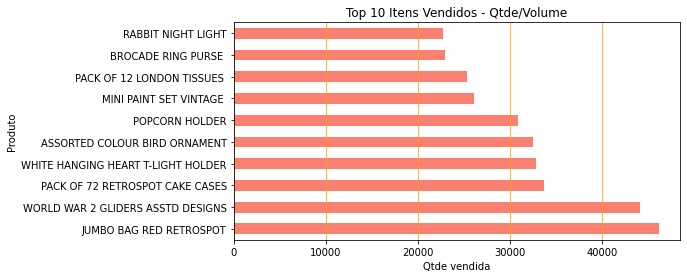

In [59]:
top_itens = dados.groupby('Item')['Qtde'].sum()
top_itens = top_itens.sort_values(ascending=False).head(10)

#Gráfico dos TOP 10 itens mais vendidos
plt.figure(figsize=(8,4))
top_itens.plot(kind='barh', color='salmon')
plt.title('Top 10 Itens Vendidos - Qtde/Volume')
plt.xlabel('Qtde vendida')
plt.ylabel('Produto')
plt.grid(axis='x', color='orange')
plt.show();

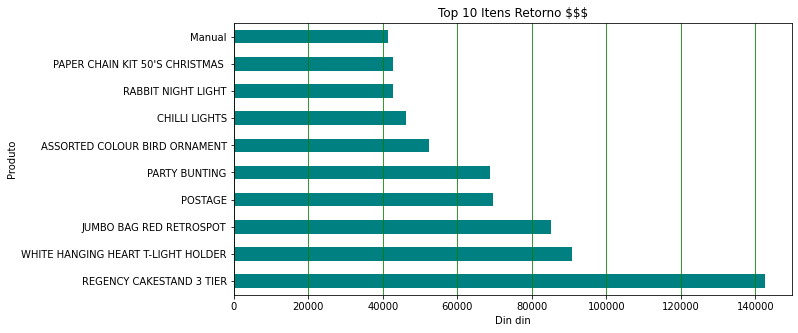

In [64]:
top_itens = dados.groupby('Item')['ValorTotal'].sum()
top_itens = top_itens.sort_values(ascending=False).head(10)

#Gráfico dos TOP 10 maiores retornos financeiros
plt.figure(figsize=(10,5))
top_itens.plot(kind='barh', color='teal')
plt.title('Top 10 Itens Retorno $$$')
plt.xlabel('Din din')
plt.ylabel('Produto')
plt.grid(axis='x', color='green')
plt.show();

Informações sobre o banco de dados

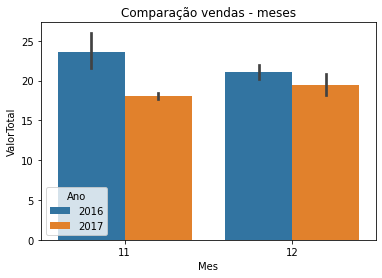

In [4]:
# Comparando os meses
comparacao_mensal = dados[(dados['Mes'] == 11) | (dados['Mes'] == 12)]
compar = comparacao_mensal.groupby(['Ano', 'Mes'])['ValorTotal'].sum()
compar = comparacao_mensal.reset_index()
plt.figure()
sns.barplot(data=compar, x='Mes', y='ValorTotal', hue='Ano')
plt.title('Comparação vendas - meses')
plt.show()

In [ ]:
dados['Ano'].value_counts()

2017    371693
2016     26153
Name: Ano, dtype: int64

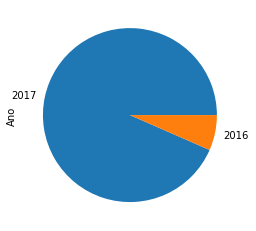

In [ ]:
dados['Ano'].value_counts().plot(kind='pie');

In [ ]:
# Separando vendas por ano
vendas_16 = dados[dados['Ano'] == 2016]
vendas_17 = dados[dados['Ano'] == 2017]

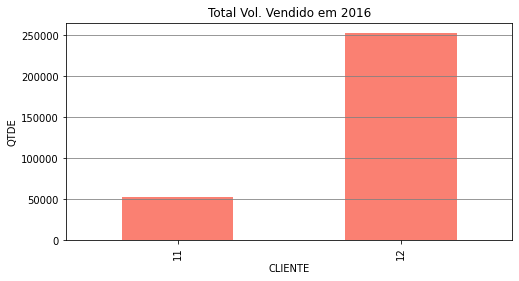

In [ ]:
# Total vendido em 2016
qtde_v16 = vendas_16.groupby('Mes')['Qtde'].sum()
#top_10_clientes = top_10_clientes.sort_values(ascending=False).head(10)

#Gráfico dos TOP 10 faturado $
plt.figure(figsize=(8,4))
qtde_v16.plot(kind='bar', color='salmon')
plt.title('Total Vol. Vendido em 2016')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')
plt.grid(axis='y', color='gray')
plt.show()

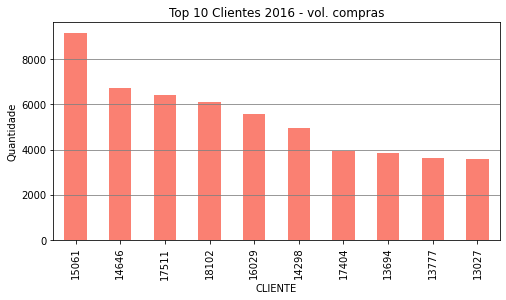

In [ ]:
# TOP 10 clientes por volume
top_clientes = vendas_16.groupby('IdCliente')['Qtde'].sum()
top_clientes = top_clientes.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_clientes.plot(kind='bar', color='salmon')
plt.title('Top 10 Clientes 2016 - vol. compras')
plt.xlabel('CLIENTE')
plt.ylabel('Quantidade')
plt.grid(axis='y', color='gray')
plt.show()

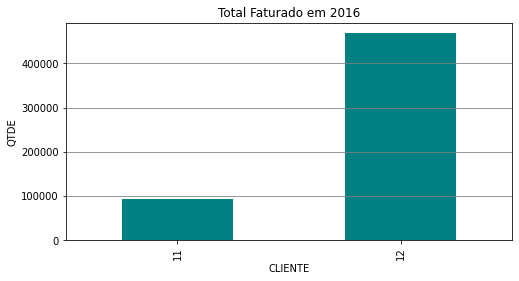

In [ ]:
# Vendido por mês em 2017
qtde_v16 = vendas_16.groupby('Mes')['ValorTotal'].sum()
#top_10_clientes = top_10_clientes.sort_values(ascending=False).head(10)

#Gráfico dos TOP 10 faturado $
plt.figure(figsize=(8,4))
qtde_v16.plot(kind='bar', color='teal')
plt.title('Total Faturado em 2016')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')
plt.grid(axis='y', color='gray')
plt.show()

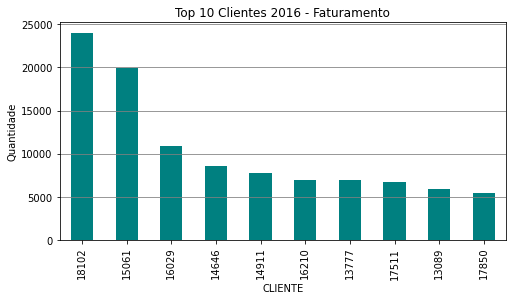

In [ ]:
# Top 10 clientes por Faturamento
top_clientes = vendas_16.groupby('IdCliente')['ValorTotal'].sum()
top_clientes = top_clientes.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_clientes.plot(kind='bar', color='teal')
plt.title('Top 10 Clientes 2016 - Faturamento')
plt.xlabel('CLIENTE')
plt.ylabel('Quantidade')
plt.grid(axis='y', color='gray')
plt.show()

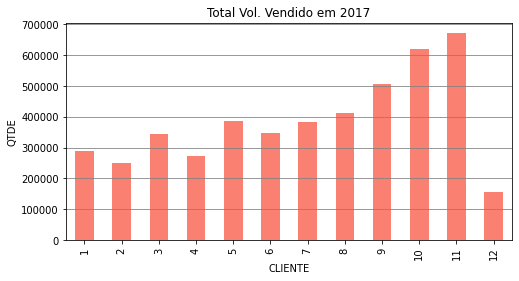

In [ ]:
# Total vendido em 2017
qtde_v17 = vendas_17.groupby('Mes')['Qtde'].sum()
#top_10_clientes = top_10_clientes.sort_values(ascending=False).head(10)

#Gráfico dos TOP 10 faturado $
plt.figure(figsize=(8,4))
qtde_v17.plot(kind='bar', color='salmon')
plt.title('Total Vol. Vendido em 2017')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')
plt.grid(axis='y', color='gray')
plt.show()

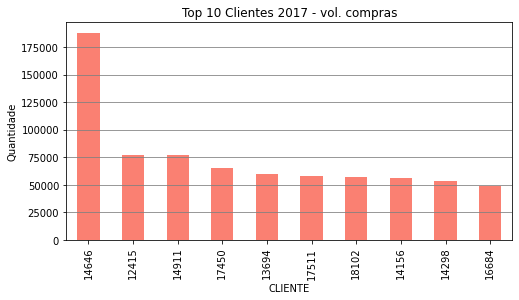

In [ ]:
# Top 10 clientes por Volume
top_clientes = vendas_17.groupby('IdCliente')['Qtde'].sum()
top_clientes = top_clientes.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_clientes.plot(kind='bar', color='salmon')
plt.title('Top 10 Clientes 2017 - vol. compras')
plt.xlabel('CLIENTE')
plt.ylabel('Quantidade')
plt.grid(axis='y', color='gray')
plt.show()

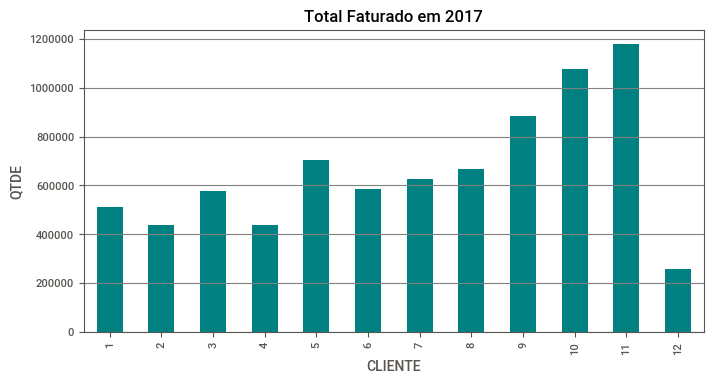

In [ ]:
# Total faturado em 2017
qtde_v17 = vendas_17.groupby('Mes')['ValorTotal'].sum()

#Gráfico dos TOP 10 faturado $
plt.figure(figsize=(8,4))
qtde_v17.plot(kind='bar', color='teal')
plt.title('Total Faturado em 2017')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')
plt.grid(axis='y', color='gray')
plt.show()

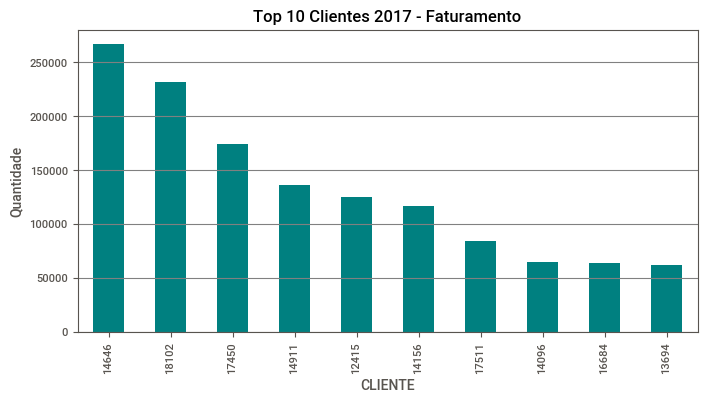

In [ ]:
# Top 10 clientes por Faturamento
top_clientes = vendas_17.groupby('IdCliente')['ValorTotal'].sum()
top_clientes = top_clientes.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_clientes.plot(kind='bar', color='teal')
plt.title('Top 10 Clientes 2017 - Faturamento')
plt.xlabel('CLIENTE')
plt.ylabel('Quantidade')
plt.grid(axis='y', color='gray')
plt.show()

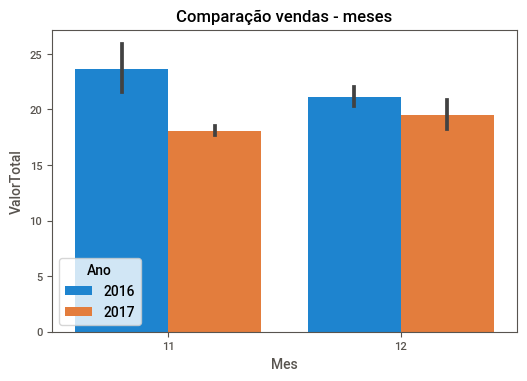

In [ ]:
# Comparando os meses
comparacao_mensal = dados[(dados['Mes'] == 11) | (dados['Mes'] == 12)]
compar = comparacao_mensal.groupby(['Ano', 'Mes'])['ValorTotal'].sum()
compar = comparacao_mensal.reset_index()
plt.figure()
sns.barplot(data=compar, x='Mes', y='ValorTotal', hue='Ano')
plt.title('Comparação vendas - meses')
plt.show()

In [ ]:
# QTDE de clientes por país
dados['País'].value_counts().head(10)

United Kingdom    354294
Germany             9040
France              8339
EIRE                7236
Spain               2484
Netherlands         2358
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: País, dtype: int64

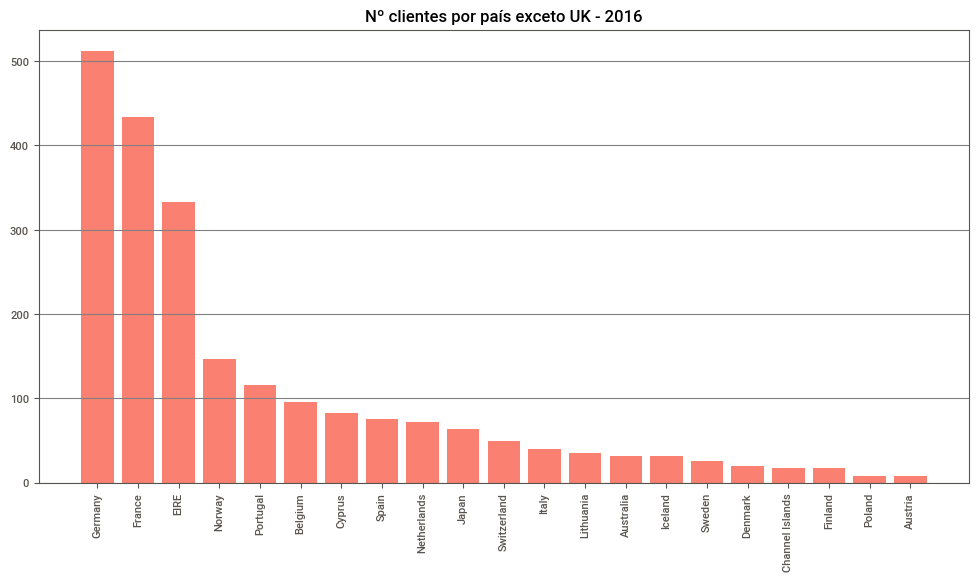

In [ ]:
#Tirando o primeiro país do gráfico
paises = vendas_16['Pais'].value_counts()[1:]
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(paises.index, paises, color = 'salmon')
ax.set_xticklabels(paises.index, rotation = 90)
ax.set_title('Nº clientes por país exceto UK - 2016')
ax.grid(axis='y',color='gray')
plt.show();

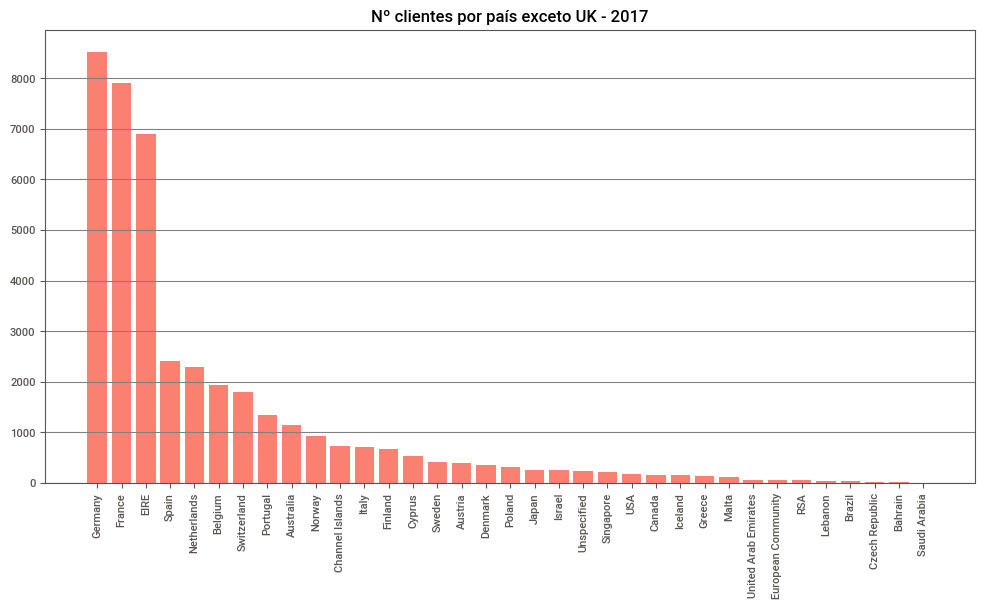

In [ ]:
#Tirando o primeiro país do gráfico
paises = vendas_17['Pais'].value_counts()[1:]
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(paises.index, paises, color = 'salmon')
ax.set_xticklabels(paises.index, rotation = 90)
ax.set_title('Nº clientes por país exceto UK - 2017')
ax.grid(axis='y', color='gray')

plt.show();